<a href="https://colab.research.google.com/github/aritradey-CS/Admission-Prediction/blob/master/PredictAdmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
from matplotlib import pyplot

In [26]:
df = pd.read_csv('Admission_Predict.csv')

In [27]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Serial No.,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.0,10.00
GRE Score,337.00,324.00,316.00,322.00,314.00,330.00,321.00,308.00,302.0,323.00
TOEFL Score,118.00,107.00,104.00,110.00,103.00,115.00,109.00,101.00,102.0,108.00
University Rating,4.00,4.00,3.00,3.00,2.00,5.00,3.00,2.00,1.0,3.00
SOP,4.50,4.00,3.00,3.50,2.00,4.50,3.00,3.00,2.0,3.50
LOR,4.50,4.50,3.50,2.50,3.00,3.00,4.00,4.00,1.5,3.00
CGPA,9.65,8.87,8.00,8.67,8.21,9.34,8.20,7.90,8.0,8.60
Research,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.0,0.00
Chance of Admit,0.92,0.76,0.72,0.80,0.65,0.90,0.75,0.68,0.5,0.45


In [28]:
df=df.rename(columns = {'Chance of Admit':'Chance of Admission'})

In [29]:
l = df.columns
print('The columns are: ',l)

The columns are:  Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [30]:
print(df.isnull().sum())
print('\n\nNo null values')

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


No null values


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [32]:
cols=df.drop(labels='Serial No.',axis=1)
cols.head().T

,0,1,2,3,4
GRE Score,337.00,324.00,316.00,322.00,314.00
TOEFL Score,118.00,107.00,104.00,110.00,103.00
University Rating,4.00,4.00,3.00,3.00,2.00
SOP,4.50,4.00,3.00,3.50,2.00
LOR,4.50,4.50,3.50,2.50,3.00
CGPA,9.65,8.87,8.00,8.67,8.21
Research,1.00,1.00,1.00,1.00,0.00
Chance of Admit,0.92,0.76,0.72,0.80,0.65


Finding Coorelation Matrix

```
# This is formatted as code
```



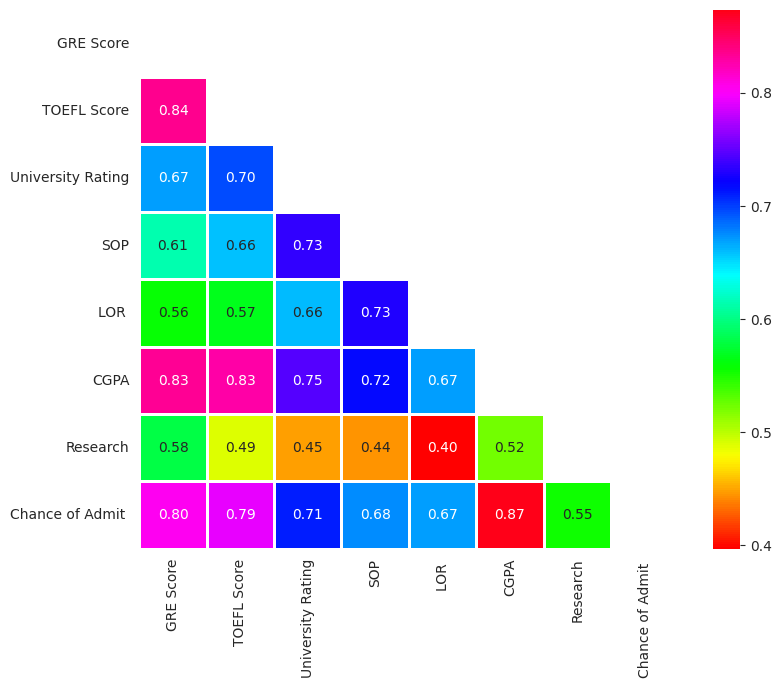

In [33]:
corr = cols.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,cmap="hsv")

Finding Density of GRE Score and TOEFL Score

<Axes: xlabel='TOEFL Score', ylabel='Density'>

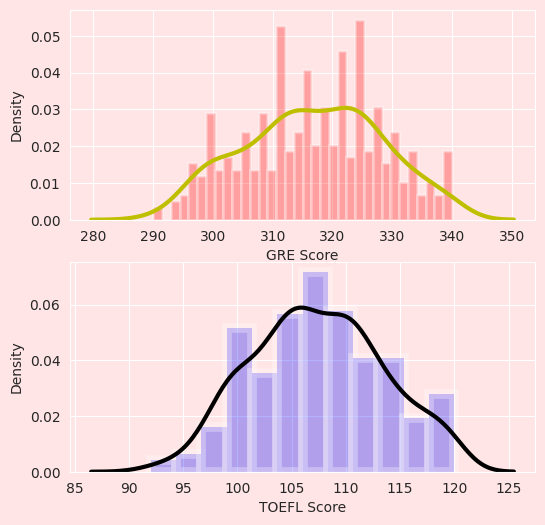

In [34]:
plt.rcParams['axes.facecolor'] = "#ffe5e5"
plt.rcParams['figure.facecolor'] = "#ffe5e5"
plt.figure(figsize=(6,6))
plt.subplot(2, 1, 1)
sns.distplot(df['GRE Score'],bins=34,color='Red',  kde_kws={"color": "y", "lw": 3, "label": "KDE"},hist_kws={"linewidth": 2,"alpha": 0.3 })
plt.subplot(2, 1, 2)
sns.distplot(df['TOEFL Score'],bins=12,color='Blue' ,kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"linewidth": 7,"alpha": 0.3 })

<Axes: xlabel='University Rating', ylabel='CGPA'>

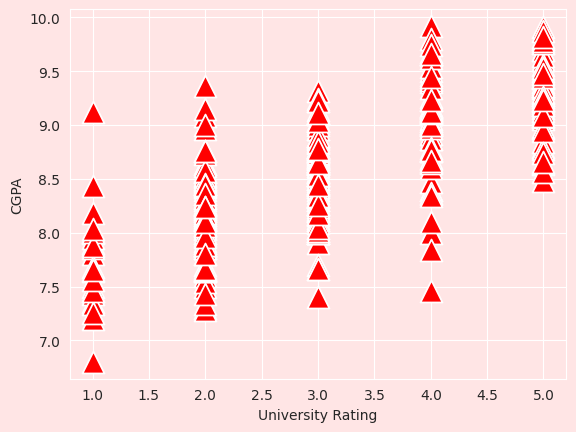

In [35]:
sns.scatterplot(x='University Rating',y='CGPA',data=df,color='Red', marker="^", s=250)

Shorting-out the GRE Score & TOEFL Score Above 300

In [36]:
co_gre=df[df["GRE Score"]>=300]
co_toefel=df[df["TOEFL Score"]>=100]

Displaying Correlation between GRA Score and Chance of Admit

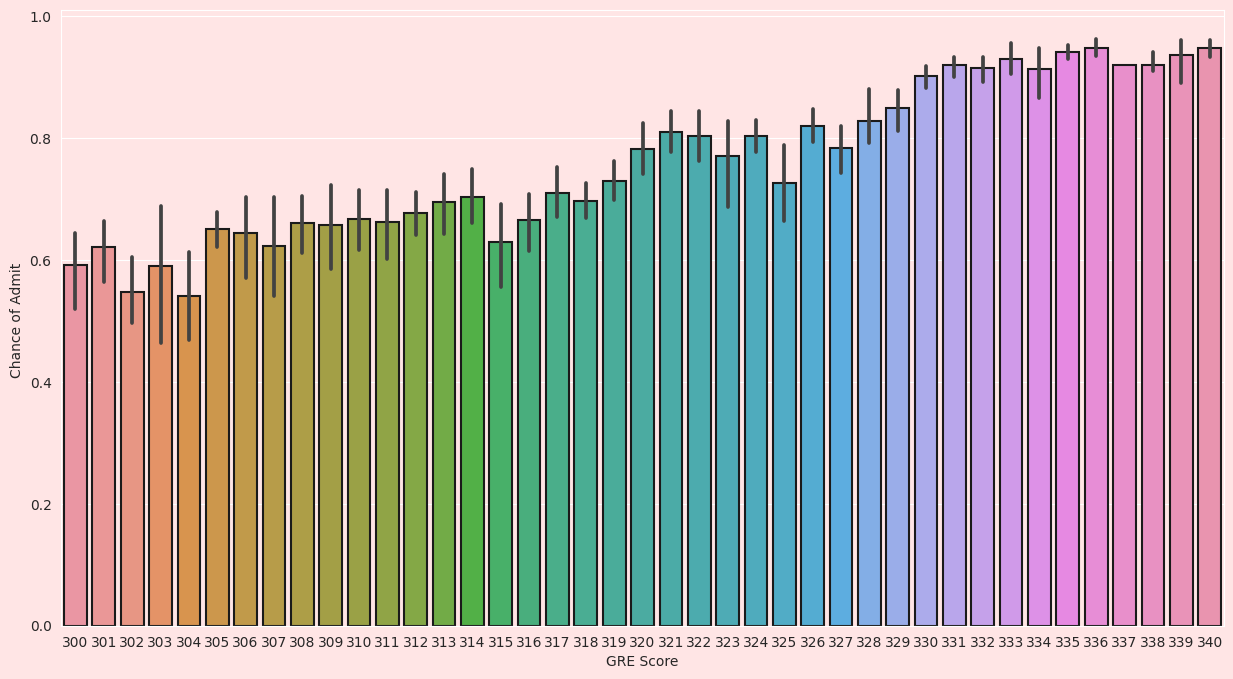

In [37]:
fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(x='GRE Score',y='Chance of Admit ',data=co_gre, linewidth=1.5,edgecolor="0.1")
plt.show()

Displaying Correlation between TOEFL Score and Chance of Admit

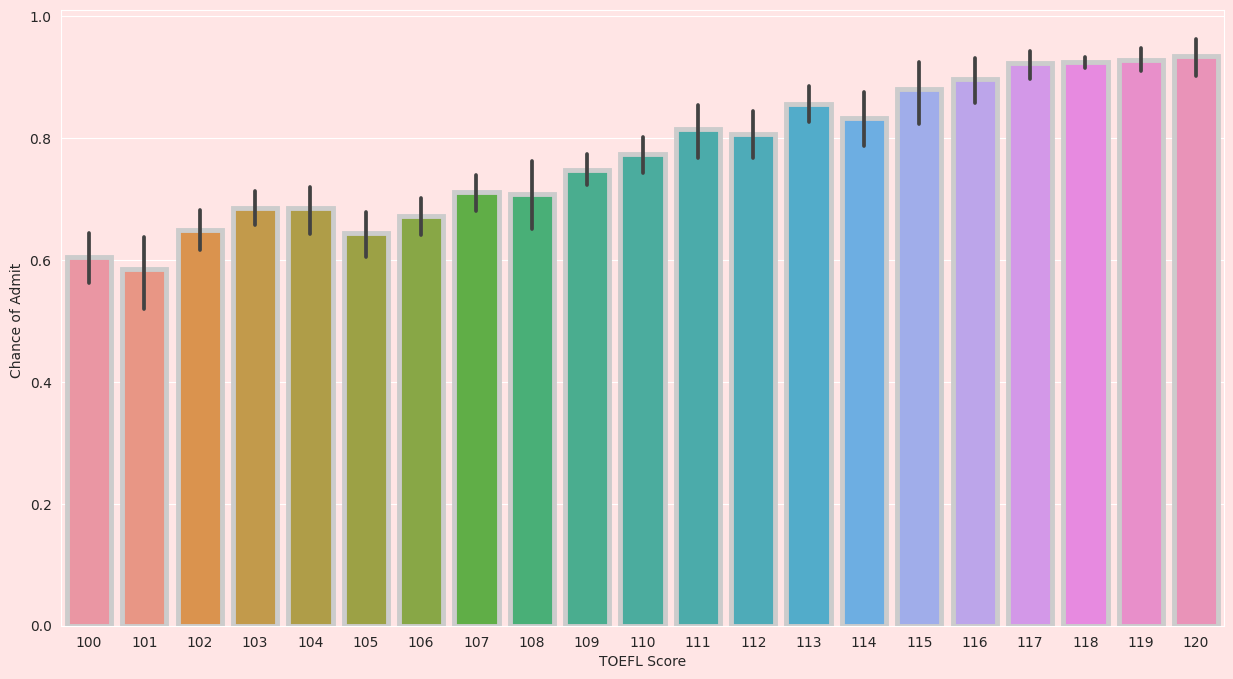

In [38]:
fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(x='TOEFL Score',y='Chance of Admit ',data=co_toefel, linewidth=3.5,edgecolor="0.8")
plt.show()

Displaying Barplot between Candidates and University Rating

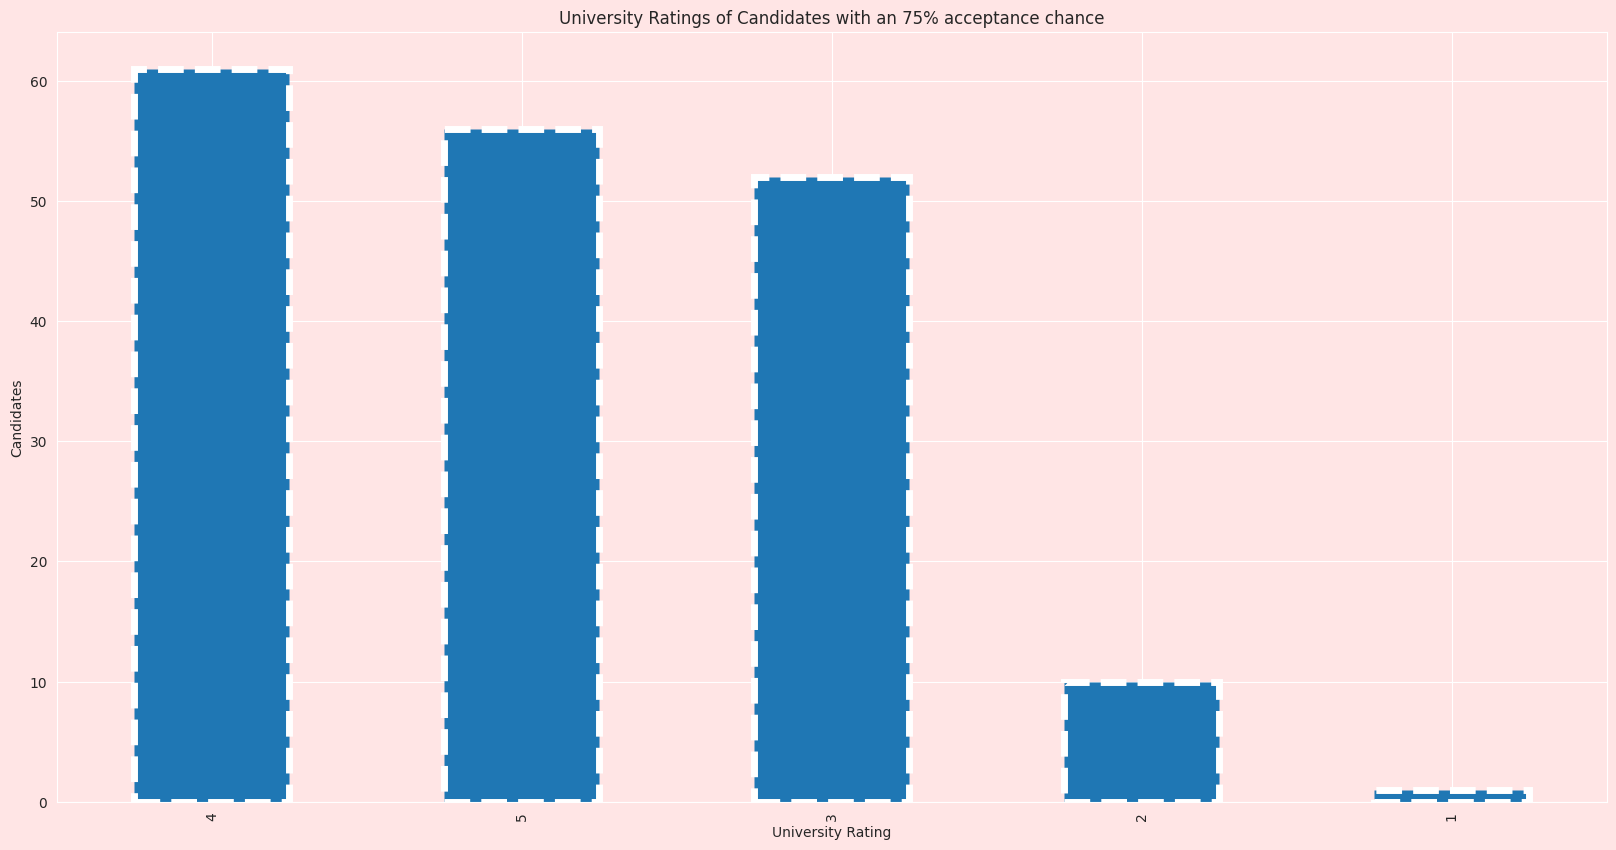

In [39]:
s = df[df["Chance of Admit "] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10),linestyle='dashed',linewidth=5)
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

Now printing Avg GRE Score out of 340

In [40]:
print("Average GRE Score :{0:.2f} out of 340".format(df['GRE Score'].mean()))


Average GRE Score :316.81 out of 340


Now printing Average TOEFL Score

In [41]:
print('Average TOEFL Score:{0:.2f} out of 120'.format(df['TOEFL Score'].mean()))


Average TOEFL Score:107.41 out of 120


Now printing Average CGPA and Chance of getting Admit

In [42]:

print('Average CGPA:{0:.2f} out of 10'.format(df['CGPA'].mean()))
print('Average Chance of getting admitted:{0:.2f}%'.format(df['Chance of Admit '].mean()*100))

Average CGPA:8.60 out of 10
Average Chance of getting admitted:72.44%


Now Combining Printing Average GRE, TOEFL CGPA and Chance of getting Admit

In [43]:
print("Average GRE Score :{0:.2f} out of 340".format(df['GRE Score'].mean()))
print('Average TOEFL Score:{0:.2f} out of 120'.format(df['TOEFL Score'].mean()))
print('Average CGPA:{0:.2f} out of 10'.format(df['CGPA'].mean()))
print('Average Chance of getting admitted:{0:.2f}%'.format(df['Chance of Admit '].mean()*100))

Average GRE Score :316.81 out of 340
Average TOEFL Score:107.41 out of 120
Average CGPA:8.60 out of 10
Average Chance of getting admitted:72.44%


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Topper of GRE Score above 330 and TOEFL Score above 155 and CGPA above 9.5

In [23]:
toppers=df[(df['GRE Score']>=330) & (df['TOEFL Score']>=115) & (df['CGPA']>=9.5)].sort_values(by=['Chance of Admit '],ascending=False)
toppers

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
203,204,334,120,5,4.0,5.0,9.87,1,0.97
24,25,336,119,5,4.0,3.5,9.80,1,0.97
143,144,340,120,4,4.5,4.0,9.92,1,0.97
202,203,340,120,5,4.5,4.5,9.91,1,0.97
385,386,335,117,5,5.0,5.0,9.82,1,0.96
213,214,333,119,5,5.0,4.5,9.78,1,0.96
81,82,340,120,4,5.0,5.0,9.50,1,0.96
148,149,339,116,4,4.0,3.5,9.80,1,0.96
399,400,333,117,4,5.0,4.0,9.66,1,0.95
372,373,336,119,4,4.5,4.0,9.62,1,0.95


Normalisation works slightly better for Regression.

In [24]:
# from sklearn.model_selection import train_test_split
# from sklearn import preprocessing

# #Normalisation works slightly better for Regression.
# X_norm=preprocessing.normalize(X)
# X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.20,random_state=101)

Create a pairplot with scatterplots on the upper triangle, distributions on the diagonal, and coefficients on the lower triangle

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
def corrplot_with_coefficients(data, size=10):
  # Compute correlation matrix
  corr = data.corr()

    # Create a pairplot
    g = sns.pairplot(data, diag_kind='kde', height=size)

    # Loop through each subplot in the pairplot
    for i in range(data.shape[1]):
        for j in range(i+1, data.shape[1]):
            # Get the current axes
            ax = g.axes[i, j]

            # Remove the scatterplot on the upper triangle
            ax.clear()

            # Plot a scatterplot with coefficients on the lower triangle
            sns.scatterplot(x=data.iloc[:, i], y=data.iloc[:, j], ax=ax, color='b', alpha=0.5)
            sns.regplot(x=data.iloc[:, i], y=data.iloc[:, j], ax=ax, scatter=False, color='r')

            # Add coefficient text on the lower triangle
            corr_coeff = corr.iloc[i, j]
            ax.text(0.5, 0.1, f'{corr_coeff:.2f}', ha='center', va='center', transform=ax.transAxes, color='r')

    # Set the diagonal plots to show distributions
    for i in range(data.shape[1]):
        ax = g.axes[i, i]
        ax.clear()
        sns.histplot(data.iloc[:, i], ax=ax, color='g')

    plt.show()


corrplot_with_coefficients(df, size=5)

Call the function to create the correlation matrix plot